# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
import matplotlib.dates as mdate
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [81]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [82]:
# Create a base url
weather_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

#Create list to hold data
#city_list=[]
city_name =[]
cloudiness = []
country = []
date = []
max_temp = []
wind_speed = []
lat = []
lng =[]
humidity = []

#Counters
record_count = 1
set_count =1

#query for each city in cities list
print("Processing Request to OpenWeatherMap API")


#loop for count
for i, city in enumerate(cities):  
     
    #print
    print(f"Response received {record_count} | {city}")   
    record_count += 1
    
    try: 
                
        city_response = requests.get(weather_url + "&q=" + city).json()
        cloudiness.append(city_response["clouds"]["all"])
        country.append(city_response["sys"]["country"])
        date.append(city_response["dt"])
        humidity.append(city_response["main"]["humidity"])
        lat.append(city_response["coord"]["lat"])
        lng.append(city_response["coord"]["lon"])
        max_temp.append(city_response["main"]["temp_max"])
        wind_speed.append(city_response["wind"]["speed"])
        city_name.append(city_response["name"])
           
        # API rate limit
        time.sleep(1.01)
   
    except (KeyError, IndexError):
        print("City not found. Skip to next...")
        #pass

print("Completed")


Processing Request to OpenWeatherMap API
Response received 1 | visby
Response received 2 | hermanus
Response received 3 | nome
Response received 4 | grand gaube
Response received 5 | yicheng
Response received 6 | east london
Response received 7 | harper
Response received 8 | myaundzha
Response received 9 | mataura
Response received 10 | waipawa
Response received 11 | butaritari
Response received 12 | kavieng
Response received 13 | thoen
Response received 14 | zhezkazgan
Response received 15 | poroshkovo
Response received 16 | tuktoyaktuk
Response received 17 | amderma
City not found. Skip to next...
Response received 18 | chagda
City not found. Skip to next...
Response received 19 | demba
Response received 20 | busselton
Response received 21 | yambio
Response received 22 | bubaque
Response received 23 | kamenskoye
City not found. Skip to next...
Response received 24 | arkhara
Response received 25 | santa lucia
Response received 26 | ushuaia
Response received 27 | veraval
Response recei

In [83]:
#check each list
print(f"this is the length of the city list: {len(city_name)}")
print(f"this is the length of the city list Cloudiness: {len(cloudiness)}")
print(f"this is the length of the city list country: {len(country)}")
print(f"this is the length of the city list date: {len(date)}")

print(f"this is the length of the city list humidity: {len(humidity)}")
print(f"this is the length of the city list lat: {len(lat)}")

print(f"this is the length of the city list lng: {len(lng)}")
print(f"this is the length of the city list max_temp: {len(max_temp)}")
print(f"this is the length of the city list wind_speed: {len(wind_speed)}")

this is the length of the city list: 586
this is the length of the city list Cloudiness: 586
this is the length of the city list country: 586
this is the length of the city list date: 586
this is the length of the city list humidity: 586
this is the length of the city list lat: 586
this is the length of the city list lng: 586
this is the length of the city list max_temp: 586
this is the length of the city list wind_speed: 586


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
#Data Dictionary
weather_data = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,}
    
# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()


City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Lat           586
Lng           586
Max Temp      586
Wind Speed    586
dtype: int64

In [85]:
#export to csv
weather_df.to_csv('weather.csv')

#Print dataframe
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Visby,0,SE,1594929614,55,57.64,18.30,63.00,4.70
1,Hermanus,0,ZA,1594929564,74,-34.42,19.23,53.01,3.00
2,Nome,75,US,1594929739,76,64.50,-165.41,57.20,4.70
3,Grand Gaube,4,MU,1594929390,78,-20.01,57.66,66.99,7.00
4,Yicheng,92,CN,1594929741,99,31.37,119.87,66.00,7.00
...,...,...,...,...,...,...,...,...,...
581,Floriano,0,BR,1594930425,31,-6.77,-43.02,91.02,9.55
582,Zhangjiakou,100,CN,1594930427,79,40.81,114.88,69.91,1.92
583,Savannah Bight,88,HN,1594930428,77,16.45,-85.85,83.26,8.43
584,Thinadhoo,95,MV,1594930179,66,0.53,72.93,84.61,3.47


In [86]:
#weather_df = pd.read_csv("weather.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [107]:
humidity100 = weather_df.sort_values('Humidity', ascending=False)
humidity100

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
313,Torbay,90,CA,1594929889,100,47.67,-52.73,48.99,19.46
350,Seddon,90,AU,1594930145,100,-37.81,144.89,41.00,8.05
311,Caçapava do Sul,100,BR,1594930098,100,-30.51,-53.49,44.28,8.21
465,Luba,90,GQ,1594930287,100,3.46,8.55,77.00,9.17
191,Banjar,20,ID,1594929959,100,-8.19,114.97,77.00,3.36
...,...,...,...,...,...,...,...,...,...
272,La Paz,40,BO,1594930039,9,-16.50,-68.15,60.80,8.05
520,Elko,1,US,1594930155,7,41.00,-115.50,91.40,5.82
137,Svarstad,0,NO,1594929896,7,59.40,9.97,60.01,3.69
89,Kaeo,100,NZ,1594929371,3,-35.10,173.78,59.00,5.01


#  Get the number of cities that have humidity over 100%.
No > cities over 100% skipping

In [108]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

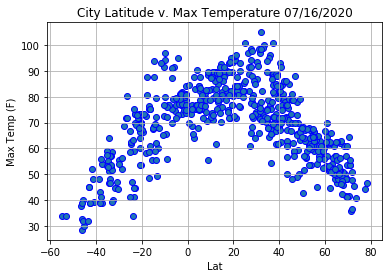

In [109]:
# Using 'Timestamp' to print the current date for whenever code runs:
current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

# Plotting 'Latitude v. Max Temperature':
x = weather_df['Lat']
y = weather_df['Max Temp']
plt.scatter(x, y, edgecolor='blue')
plt.title(f"City Latitude v. Max Temperature {current_date}")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.grid()
plt.savefig('TempPlot.png')
plt.show()

## Latitude vs. Humidity Plot

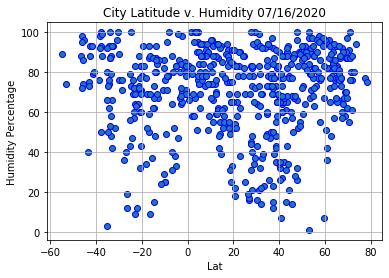

In [110]:
# Using 'Timestamp' to print the current date for whenever code runs:
#current_date = pd.Timestamp("today").strftime("%m/%d/%Y")

# Plotting 'Latitude v. Humidity':
x = weather_df['Lat']
y = weather_df['Humidity']
plt.scatter(x, y, edgecolor='blue')
plt.title(f"City Latitude v. Humidity {current_date}")
plt.xlabel("Lat")
plt.ylabel("Humidity Percentage")
plt.grid()
plt.savefig('HumidPlot.png')
plt.show()

## Latitude vs. Cloudiness Plot

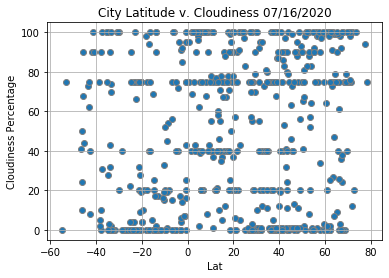

In [111]:
# Plotting 'Latitude v. Max Cloudiness':
x = weather_df['Lat']
y = weather_df['Cloudiness']
plt.scatter(x, y, edgecolor='gray')
plt.title(f"City Latitude v. Cloudiness {current_date}")
plt.xlabel("Lat")
plt.ylabel("Cloudiness Percentage")
plt.grid()
plt.savefig('CloudPlot.png')
plt.show()

## Latitude vs. Wind Speed Plot

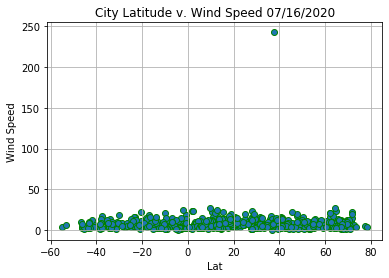

In [112]:
# Plotting 'Latitude v. Wind Speed':

x = weather_df['Lat']
y = weather_df['Wind Speed']
plt.scatter(x, y, edgecolor='g')
plt.title(f"City Latitude v. Wind Speed {current_date}")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig('Windplot.png')
plt.show()


## Linear Regression

In [113]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear(x,y,xannotate, yannotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress = x * slope + intercept
    line = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
#Scatter Plot
    plt.scatter(x,y)
    plt.plot(x,regress,"r-")
#Annotate
    plt.annotate(line,(xannotate,yannotate),fontsize=15,color="red")
#print    
    print(f"rvalue    = {round(rvalue, 3)}")
    print(f"r-squared = {round(rvalue**2, 3)}")

In [114]:
# Create Northern and Southern Hemisphere DataFrames

southHem=weather_df[weather_df['Lat']<0]
northHem=weather_df[weather_df['Lat']>0]
southHem

#see next block for North DataFrame


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Hermanus,0,ZA,1594929564,74,-34.42,19.23,53.01,3.00
3,Grand Gaube,4,MU,1594929390,78,-20.01,57.66,66.99,7.00
5,East London,0,ZA,1594929523,42,-33.02,27.91,58.68,5.39
8,Mataura,24,NZ,1594929529,98,-46.19,168.86,28.42,2.08
9,Waipawa,100,NZ,1594929747,79,-41.41,175.52,48.00,7.00
...,...,...,...,...,...,...,...,...,...
560,Karoi,0,ZW,1594930400,59,-16.81,29.69,48.58,4.59
563,Saint-Joseph,75,RE,1594929964,72,-21.37,55.62,68.00,5.82
573,Sambava,0,MG,1594929936,80,-14.27,50.17,69.39,10.71
577,Sola,100,VU,1594930421,86,-13.88,167.55,79.52,16.22


In [115]:
northHem=weather_df[weather_df['Lat']>0]
northHem

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Visby,0,SE,1594929614,55,57.64,18.30,63.00,4.70
2,Nome,75,US,1594929739,76,64.50,-165.41,57.20,4.70
4,Yicheng,92,CN,1594929741,99,31.37,119.87,66.00,7.00
6,Harper,98,LR,1594929527,76,4.38,-7.72,75.34,10.02
7,Myaundzha,73,RU,1594929745,86,63.05,147.19,53.80,5.14
...,...,...,...,...,...,...,...,...,...
580,Notre-Dame-du-Lac,1,CA,1594930424,32,47.61,-68.80,73.00,10.29
582,Zhangjiakou,100,CN,1594930427,79,40.81,114.88,69.91,1.92
583,Savannah Bight,88,HN,1594930428,77,16.45,-85.85,83.26,8.43
584,Thinadhoo,95,MV,1594930179,66,0.53,72.93,84.61,3.47


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = -0.713
r-squared = 0.508


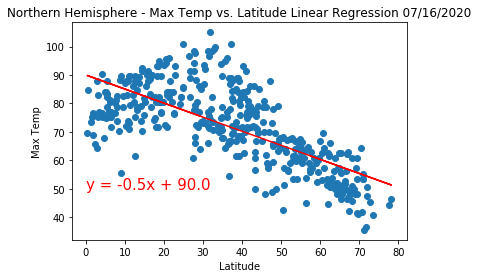

In [116]:
# Using 'Timestamp' to print the current date for whenever code runs:
# Plotting 'Latitude v. Max Temperature
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression {current_date}")
linear(northHem['Lat'],northHem['Max Temp'],0,50)
plt.xlabel('Latitude')
plt.ylabel("Max Temp")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = 0.816
r-squared = 0.666


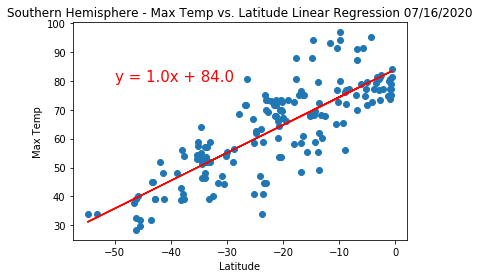

In [117]:
# Plotting 'Latitude v. Max Temperature

plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression {current_date}")
linear(southHem['Lat'],southHem['Max Temp'],-50,80)
plt.xlabel('Latitude')
plt.ylabel("Max Temp")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = 0.059
r-squared = 0.003


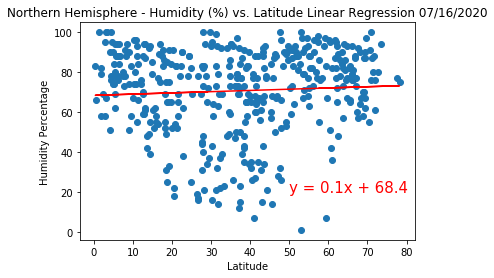

In [118]:
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression {current_date}")
linear(northHem['Lat'],northHem['Humidity'],50,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')


plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = -0.132
r-squared = 0.017


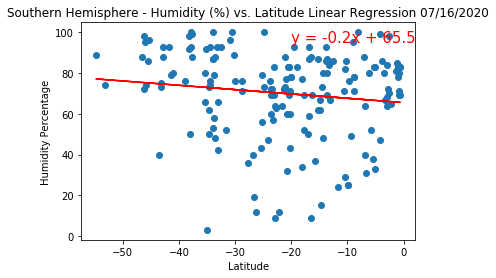

In [119]:
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression {current_date}")

linear(southHem['Lat'],southHem['Humidity'],-20,95)
plt.xlabel('Latitude')
plt.ylabel('Humidity Percentage')


plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = -0.021
r-squared = 0.0


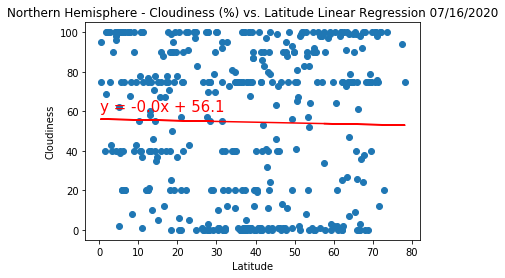

In [120]:
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {current_date}")
linear(northHem['Lat'],northHem['Cloudiness'],.20,60)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = -0.078
r-squared = 0.006


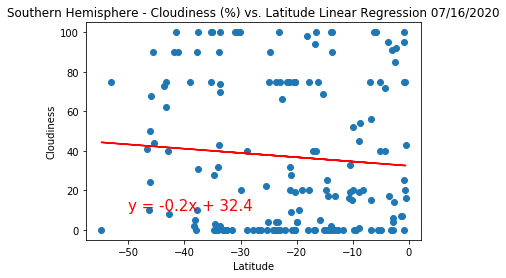

In [121]:
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression {current_date}")
linear(southHem['Lat'],southHem['Cloudiness'],-50,10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = -0.037
r-squared = 0.001


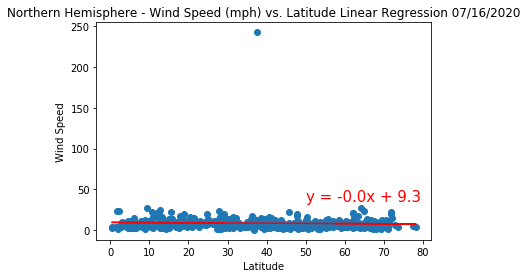

In [122]:
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {current_date}")
linear(northHem['Lat'],northHem['Wind Speed'],50,35)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = 0.117
r-squared = 0.014


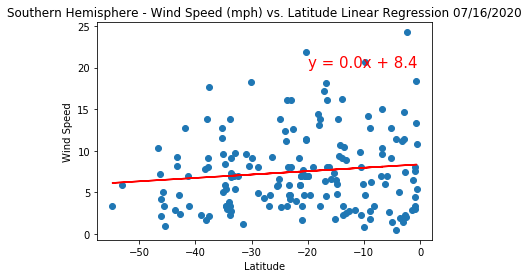

In [123]:
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression {current_date}")
linear(southHem['Lat'],southHem['Wind Speed'],-20,20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


plt.show()